<a href="https://colab.research.google.com/github/diptomondal007/Ai-Assignment/blob/main/air_quality_prediction_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
%matplotlib inline

In [4]:
uploaded = files.upload()

Saving Data.csv to Data (1).csv


In [6]:
for f in uploaded.keys():
  data_frame = pd.read_csv(f)
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [10]:
data_frame[data_frame['PM 2.5'].isnull()]

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
184,14.3,19.2,10.9,1020.5,91.0,1.6,4.8,11.1,NaN


In [12]:
data_frame.fillna(method='ffill', inplace = True)

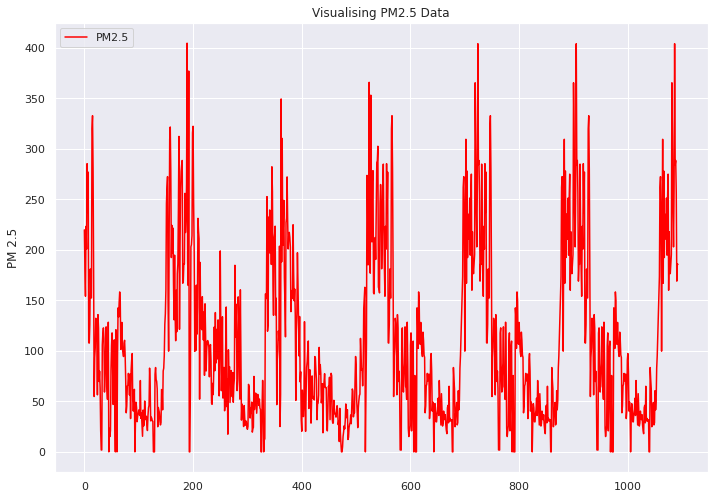

In [14]:
rcParams['figure.figsize'] = 11.7,8.27

sns.lineplot(data = data_frame["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

In [16]:
duplicateRowsDF = data_frame[data_frame.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
         T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
731   16.9  25.1   6.6  1021.3  65.0  1.1   2.0   7.6  284.795833
732   15.5  24.1   7.7  1021.0  71.0  1.1   3.5  11.1  219.720833
733   14.9  22.8   8.0  1018.4  73.0  1.1   5.9  13.0  182.187500
734   18.3  24.7  11.5  1018.1  85.0  0.5   1.1   7.6  154.037500
735   16.5  24.7  12.0  1017.4  82.0  0.6   8.0  13.0  223.208333
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[362 rows x 9 columns]


In [18]:
data_frame = data_frame[data_frame.duplicated() == False]

In [20]:
data_frame.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,25.556908,32.231874,19.273598,1008.196854,64.134063,1.891929,6.630369,15.696580,108.036007
std,7.286760,6.852548,7.454202,7.564601,15.460460,0.686446,3.967064,7.654019,82.570588
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,18.850000,27.550000,12.000000,1001.300000,55.000000,1.400000,3.500000,11.100000,43.583333
50%,27.700000,34.100000,21.000000,1008.500000,66.000000,1.900000,6.300000,14.800000,81.833333
75%,31.200000,36.900000,25.900000,1015.000000,75.000000,2.400000,9.100000,18.300000,154.037500
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


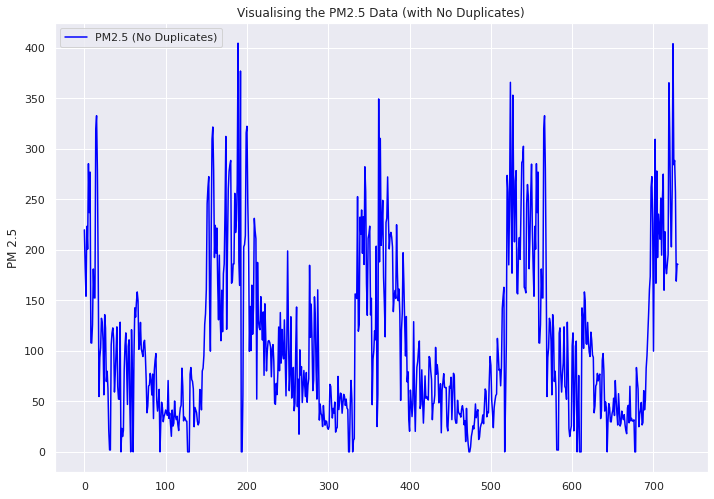

In [22]:
sns.lineplot(data = data_frame["PM 2.5"], color="blue", label="PM2.5 (No Duplicates)")
plt.title('Visualising the PM2.5 Data (with No Duplicates)')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = data_frame[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = data_frame['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 45ms/step - loss: 85747.2143 - val_loss: 64017.3320
Epoch 2/400
6/6 [==============================] - 0s 8ms/step - loss: 63385.5580 - val_loss: 47441.7383
Epoch 3/400
6/6 [==============================] - 0s 8ms/step - loss: 46157.0709 - val_loss: 36898.0156
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 37093.2701 - val_loss: 30191.8887
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 29441.4090 - val_loss: 26302.4570
Epoch 6/400
6/6 [==============================] - 0s 8ms/step - loss: 27375.6582 - val_loss: 23441.2988
Epoch 7/400
6/6 [==============================] - 0s 8ms/step - loss: 26238.5050 - val_loss: 21254.9570
Epoch 8/400
6/6 [==============================] - 0s 8ms/step - loss: 23261.4297 - val_loss: 19598.9570
Epoch 9/400
6/6 [==============================] - 0s 8ms/step - loss: 22354.5541 - val_loss: 18354.1152
Epoch 10/400
6/6 [==============================] - 0s

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 19)                171       
_________________________________________________________________
dense_6 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_7 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_8 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 20        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_pred = model.predict(X_val)

MAE: 38.41927834244461
MSE: 2761.0406544171437
RMSE: 52.54560547198161
VarScore: 0.44550857192729587


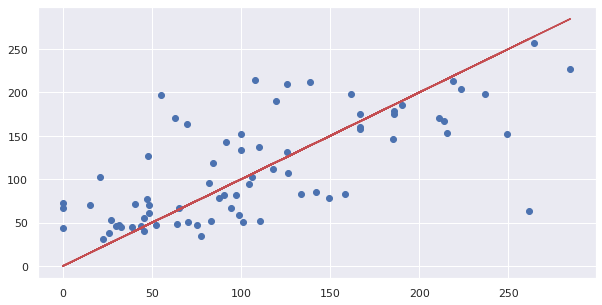

In [37]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_val, y_pred))  
print('MSE:', metrics.mean_squared_error(y_val, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_val,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred)
# Perfect predictions
plt.plot(y_val,y_val,'r')

In [38]:
y = np.array(y_val)
y_p = np.array(y_pred).flatten()
df = pd.DataFrame({"test": y, "predictions": y_p})
df.head(100)

,test,predictions
0,166.916667,175.052597
1,105.833333,102.788704
2,22.333333,31.418713
3,32.583333,44.804718
4,75.125000,46.794895
...,...,...
69,110.416667,52.256950
70,38.666667,44.969379
71,81.833333,95.839767
72,126.000000,131.174805
